# Predictions on Titanic Dataset

## Importing Functions and data

In [87]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [88]:
test_df = pd.read_csv("./dataset/test.csv")
train_df = pd.read_csv("./dataset/train.csv")

## Exploring the Dataset

In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### The training-set has 891 examples and 11 features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [90]:
import pandas_profiling
train_df.profile_report()

From the profiling we can see that Age has 177 missing values and Cabin has 687 missing values. 
Parch and SibSp also have 678 and 608 zeroes. 
These columns have to be fixed before we can train the model otherwise our model will consider zeroes and missing values as real-valued attributes

In [91]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

The dataset has a lot of columns with string data which have to be converted to numerical attributes

In [92]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Total     %
Cabin       687  77.1
Age         177  19.9
Embarked      2   0.2
Fare          0   0.0
Ticket        0   0.0

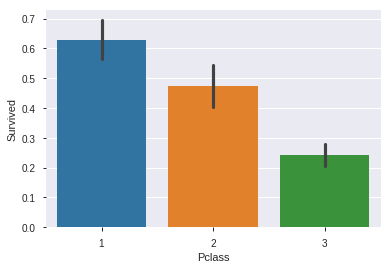

In [93]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

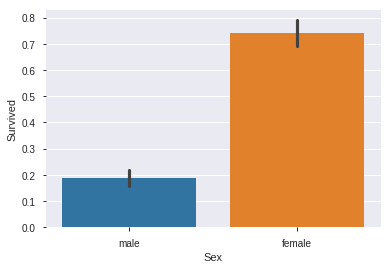

In [94]:
sns.barplot(x='Sex', y='Survived', data=train_df)

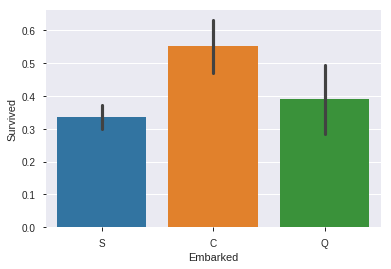

In [95]:
sns.barplot(x='Embarked', y='Survived', data=train_df)

## Data Preprocessing

In [96]:
train_df = train_df.drop(['PassengerId'], axis=1)

Passenger ID is not important so let's drop it

##### Converting cabins to numerical attributes

In [97]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

###### Filling Null values in Age

In [98]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [99]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

###### Since there are only a few null values in embarked let's just replace it with the most common one

In [100]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 76.6+ KB


## Converting Features

In [102]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [103]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [104]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [105]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [106]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### Creating Categories

Let's create a few categories so that we can deal with the continious age in the form of categorical data

In [107]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

4    158
6    156
5    154
3    141
2    114
1    100
0     68
Name: Age, dtype: int64

In [108]:
train_df.head(10)

Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Deck  Title
0         0       3    0    2      1      0     7         0     8      1
1         1       1    1    5      1      0    71         1     3      3
2         1       3    1    3      0      0     7         0     8      2
3         1       1    1    5      1      0    53         0     3      3
4         0       3    0    5      0      0     8         0     8      1
5         0       3    0    1      0      0     8         2     8      1
6         0       1    0    6      0      0    51         0     5      1
7         0       3    0    0      3      1    21         0     8      4
8         1       3    1    3      0      2    11         0     8      3
9         1       2    1    1      1      0    30         1     8      3

Now fare is a bit tricky to handle as it is not spread out evenly

In [109]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df["Fare"].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

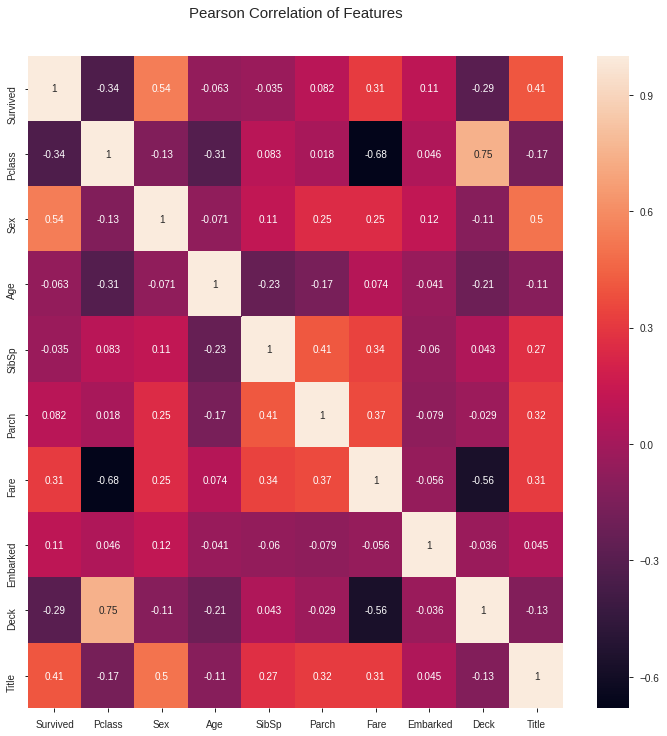

In [110]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(), annot=True)

## Training our model

In [111]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [114]:
results = pd.DataFrame({
    'Model': ['Decision Tree'],
    'Score': [acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')


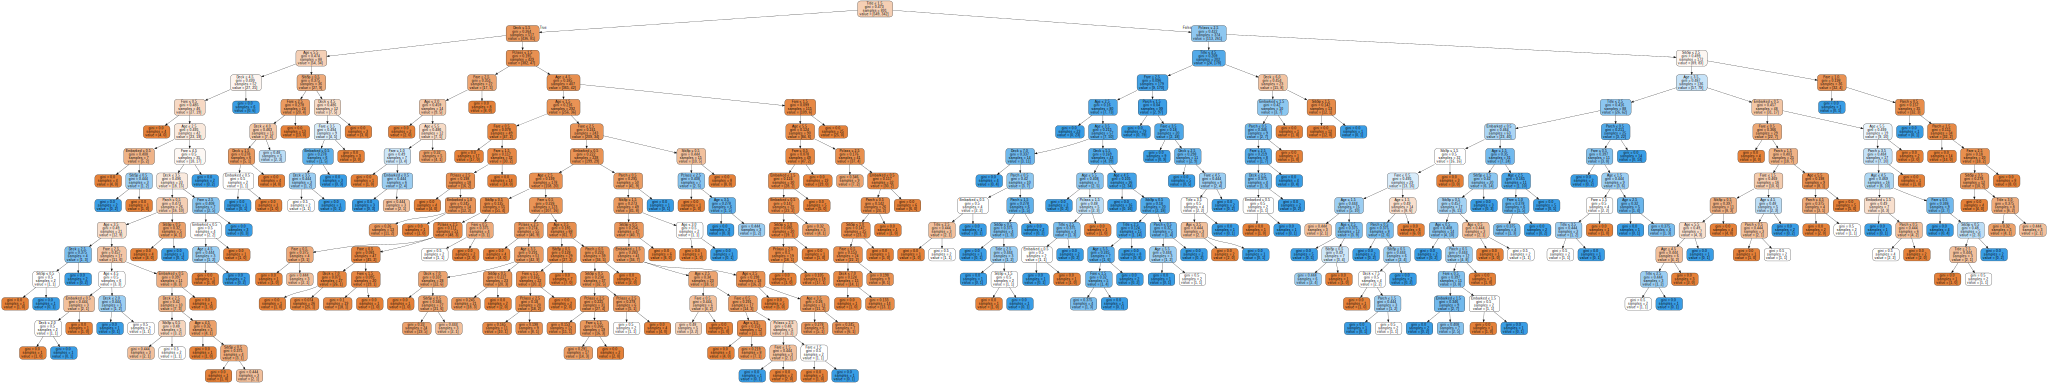

In [115]:
from sklearn import tree
import graphviz 
import pydotplus
train_columns = X_train.columns
dot_data = tree.export_graphviz(decision_tree, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                                
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('nonprunned_tree.png')
graph

From the tree we can see that this is a huge tree with multiple leaf nodes and decision boundaries.
We can try and prune the tree and test if that can make our model better in any way

## Testing different hyperparameters / Pruning

##### Adding a max depth of 5, max leaf nodes as 10 and 5 minimum sample leaves

In [116]:
decision_tree_pruned_10 = DecisionTreeClassifier( max_depth=5,
            max_leaf_nodes=10, min_samples_leaf=5,) 
decision_tree_pruned_10.fit(X_train, Y_train)  
Y_pred_pruned_10 = decision_tree_pruned_10.predict(X_test)  
acc_decision_tree_pruned_10 = round(decision_tree_pruned_10.score(X_train, Y_train) * 100, 2)

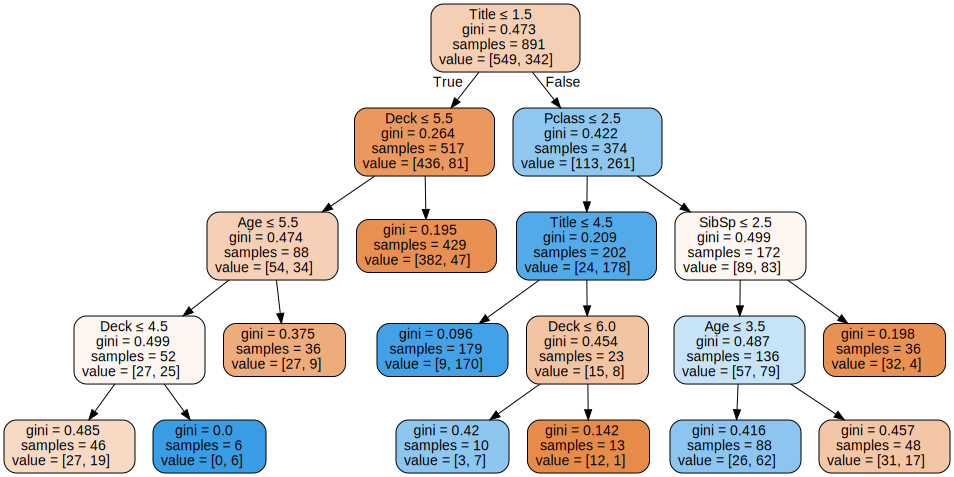

In [145]:
from sklearn import tree
import graphviz 
import pydotplus
train_columns = X_train.columns
dot_data = tree.export_graphviz(decision_tree_pruned_10, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('prunned_tree.png')
graph

##### Adding a max depth of 5, max leaf nodes as 20 and 5 minimum sample leaves

In [117]:
decision_tree_pruned_20 = DecisionTreeClassifier( max_depth=5,
            max_leaf_nodes=20, min_samples_leaf=5,) 
decision_tree_pruned_20.fit(X_train, Y_train)  
Y_pred_pruned_20 = decision_tree_pruned_20.predict(X_test)  
acc_decision_tree_pruned_20 = round(decision_tree_pruned_20.score(X_train, Y_train) * 100, 2)

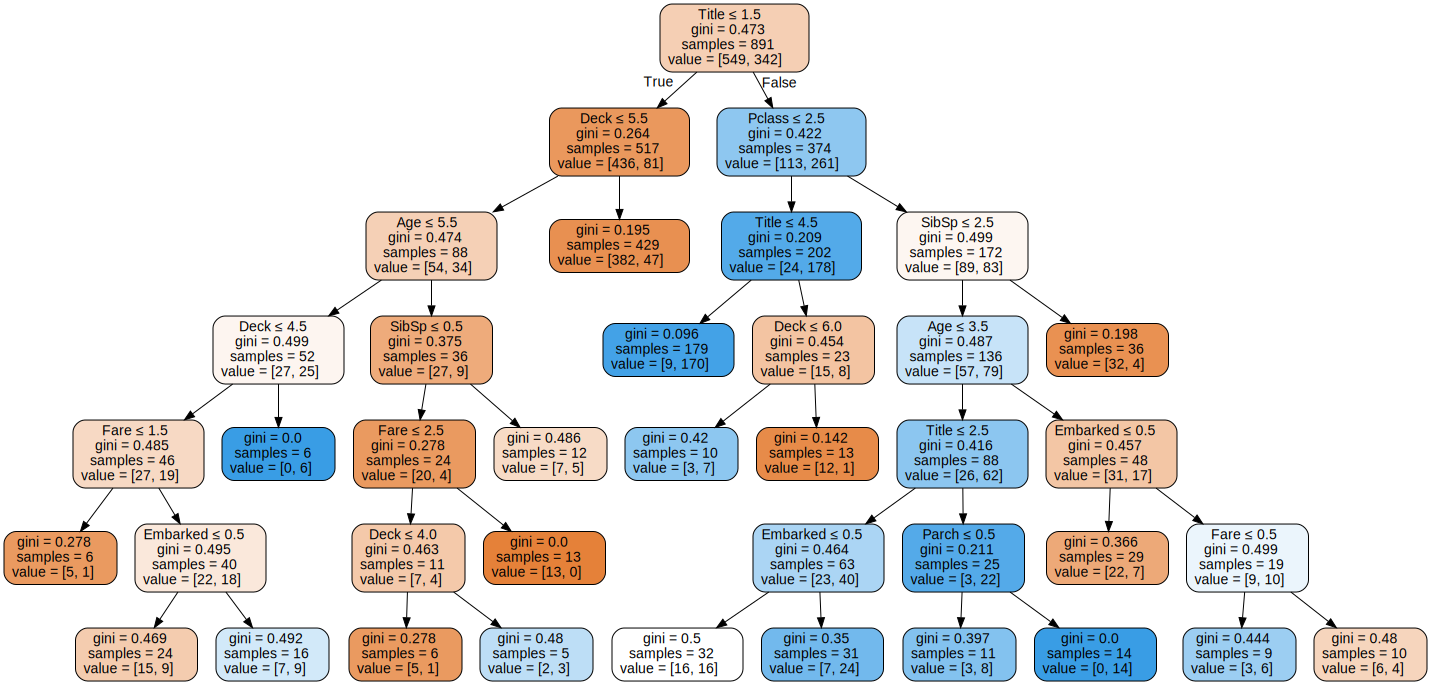

In [146]:
from sklearn import tree
import graphviz 
import pydotplus
train_columns = X_train.columns
dot_data = tree.export_graphviz(decision_tree_pruned_20, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('prunned_tree_20.png')
graph

##### Adding a max depth of 2, max leaf nodes as 20 and 5 minimum sample leaves

In [118]:
decision_tree_pruned_2 = DecisionTreeClassifier( max_depth=2,
            max_leaf_nodes=20, min_samples_leaf=5,) 
decision_tree_pruned_2.fit(X_train, Y_train)  
Y_pred_pruned_2 = decision_tree_pruned_2.predict(X_test)  
acc_decision_tree_pruned_2 = round(decision_tree_pruned_2.score(X_train, Y_train) * 100, 2)

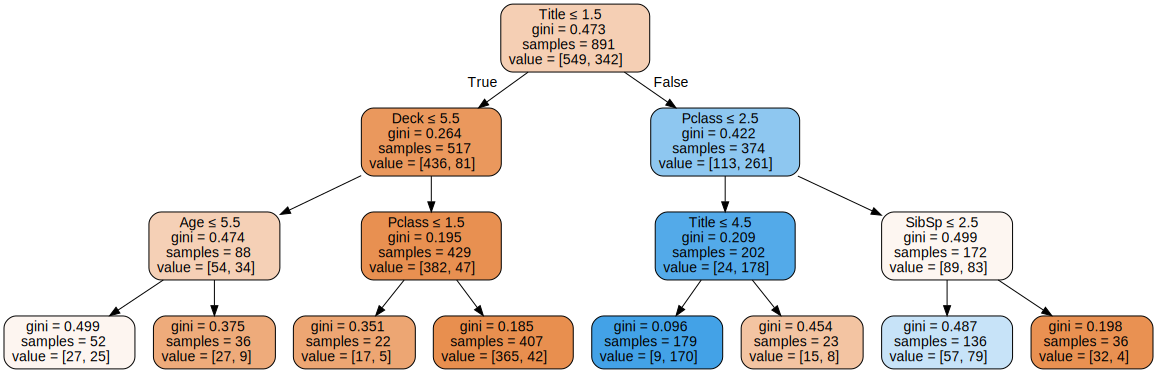

In [147]:
from sklearn import tree
import graphviz 
import pydotplus
train_columns = X_train.columns
dot_data = tree.export_graphviz(decision_tree_pruned_2, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('prunned_tree_2.png')
graph

###### Adding minimum sample split as 4

In [119]:
decision_tree_pruned_split = DecisionTreeClassifier(min_samples_split=4) 
decision_tree_pruned_split.fit(X_train, Y_train)  
Y_pred_pruned_split = decision_tree_pruned_split.predict(X_test)  
acc_decision_tree_pruned_split = round(decision_tree_pruned_split.score(X_train, Y_train) * 100, 2)

###### Adding minimum sample split as 10

In [120]:
decision_tree_pruned_split2 = DecisionTreeClassifier(min_samples_split=10) 
decision_tree_pruned_split2.fit(X_train, Y_train)  
Y_pred_pruned_split2 = decision_tree_pruned_split2.predict(X_test)  
acc_decision_tree_pruned_split2 = round(decision_tree_pruned_split2.score(X_train, Y_train) * 100, 2)

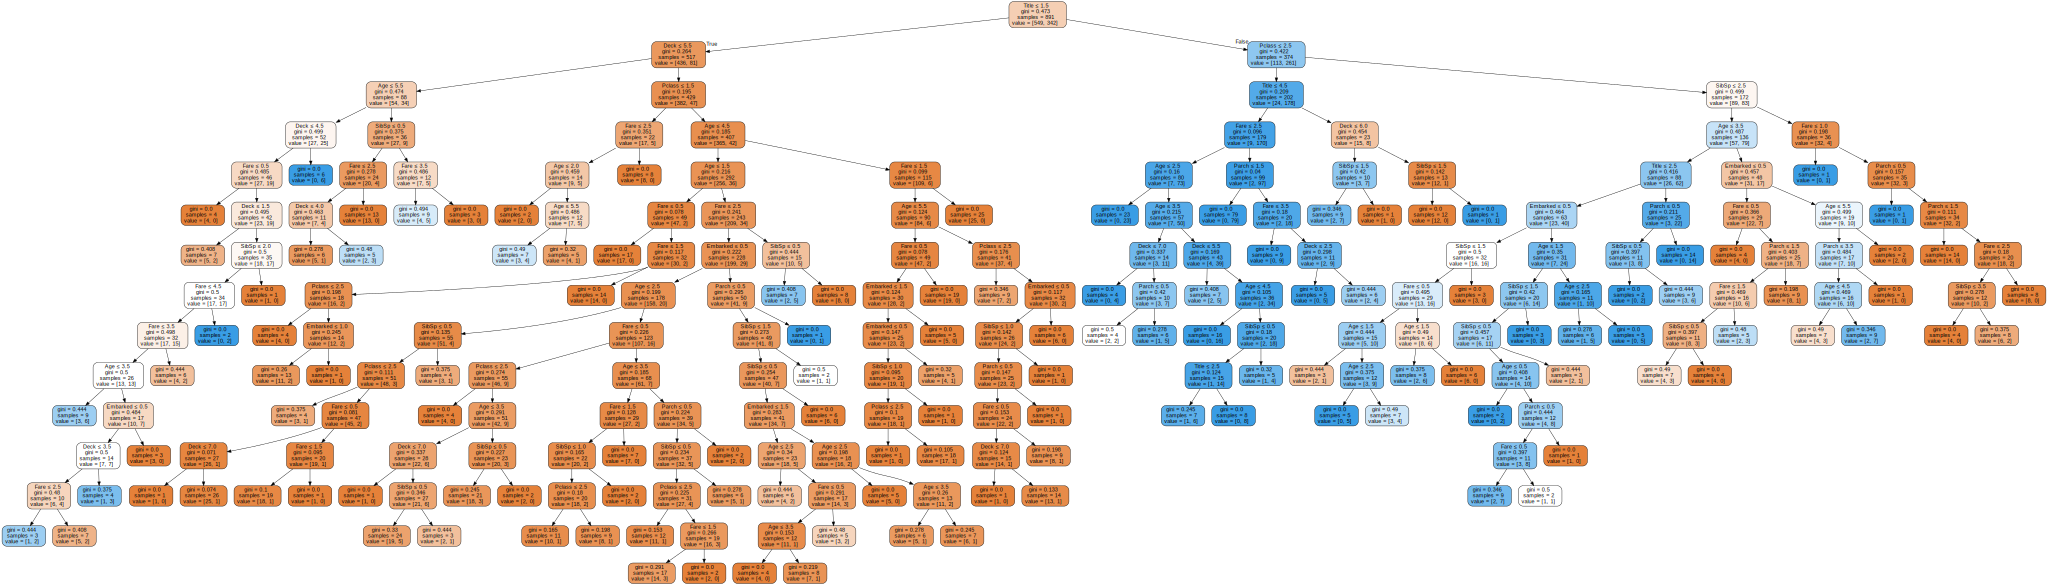

In [148]:
from sklearn import tree
import graphviz 
import pydotplus
train_columns = X_train.columns
dot_data = tree.export_graphviz(decision_tree_pruned_split2, 
                                out_file=None,
                                filled=True, 
                                rounded=True,  
                                special_characters=True,
                               feature_names = train_columns) 
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('prunned_tree_split_2.png')
graph

##### Creating a table to compare the scores

In [121]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Decison Tree Pruned - 10 leaf nodes','Decison Tree Pruned - 20 leaf nodes','Decison Tree Pruned - 2 Max Depth','Decison Tree Pruned Split','Decison Tree Pruned Split 10'],
    'Score': [acc_decision_tree,acc_decision_tree_pruned_10,acc_decision_tree_pruned_20,acc_decision_tree_pruned_2,acc_decision_tree_pruned_split,acc_decision_tree_pruned_split2]})
result_df = results.sort_values(by='Score', ascending=False)

## Results

In [122]:
result_df

Model  Score
0                        Decision Tree  92.82
4            Decison Tree Pruned Split  91.36
5         Decison Tree Pruned Split 10  89.00
2  Decison Tree Pruned - 20 leaf nodes  85.52
1  Decison Tree Pruned - 10 leaf nodes  84.85
3    Decison Tree Pruned - 2 Max Depth  82.15

From this we can see that decision tree pruning hasn't been helpful in improving the model and the default hyperparameters seem to be working well with our data.
We can use GridSearchCV to check for the best hyperparameters and further increase the accuracy of the model.


## Trying Random Forest to improve accuracy

In [123]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [124]:
results = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree','Decison Tree Pruned - 10 leaf nodes','Decison Tree Pruned - 20 leaf nodes','Decison Tree Pruned - 2 Max Depth','Decison Tree Pruned Split','Decison Tree Pruned Split 10'],
    'Score': [acc_random_forest,acc_decision_tree,acc_decision_tree_pruned_10,acc_decision_tree_pruned_20,acc_decision_tree_pruned_2,acc_decision_tree_pruned_split,acc_decision_tree_pruned_split2]})
result_df = results.sort_values(by='Score', ascending=False)

In [125]:
result_df

Model  Score
0                        Random Forest  92.82
1                        Decision Tree  92.82
5            Decison Tree Pruned Split  91.36
6         Decison Tree Pruned Split 10  89.00
3  Decison Tree Pruned - 20 leaf nodes  85.52
2  Decison Tree Pruned - 10 leaf nodes  84.85
4    Decison Tree Pruned - 2 Max Depth  82.15

## Testing Accuracy

### Using Cross Validation as it seems that the models are overfitting

In [128]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.8        0.74157303 0.80898876 0.85393258 0.79775281
 0.76404494 0.79775281 0.86516854 0.81818182]
Mean: 0.8014061967994552
Standard Deviation: 0.03657178141944784


Here we can see that once we do K cross-fold validation our accuracy decreases. 
This implies that our model was over-fitting the data. 

### Using Confusion Matrix to check true and false positives & negatives

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(decision_tree, X_train, Y_train, cv=3)
mat = confusion_matrix(Y_train, predictions)
mat

array([[491,  58],
       [111, 231]])

The first row is about the not-survived-predictions: 491 passengers were correctly classified as not survived (called true negatives) and 58 where wrongly classified as not survived (false positives).

The second row is about the survived-predictions: 111 passengers where wrongly classified as survived (false negatives) and 231 where correctly classified as survived (true positives).

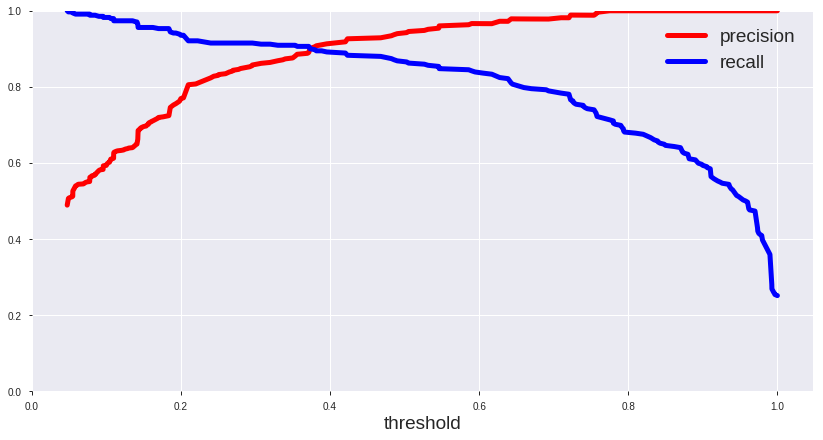

In [130]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#### Above you can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that we may want to select the precision/recall tradeoff before that — maybe at around 75%

## Possibility of Survival

In [142]:
not_survived = sum(mat[0])/sum(mat[0]+sum(mat[1]))
survived = sum(mat[1])/sum(mat[0]+sum(mat[1]))

In [143]:
not_survived

0.44525547445255476

In [144]:
survived

0.2773722627737226